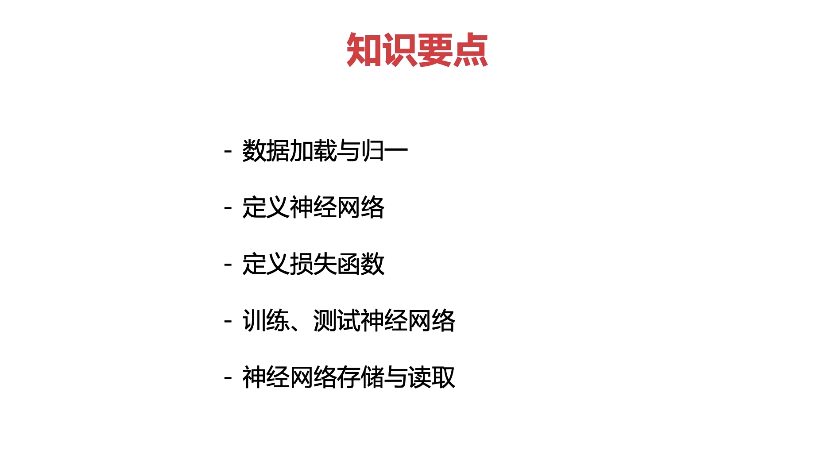

# 数据加载与归一

###### 100个epoch就是把训练数据计算了100遍

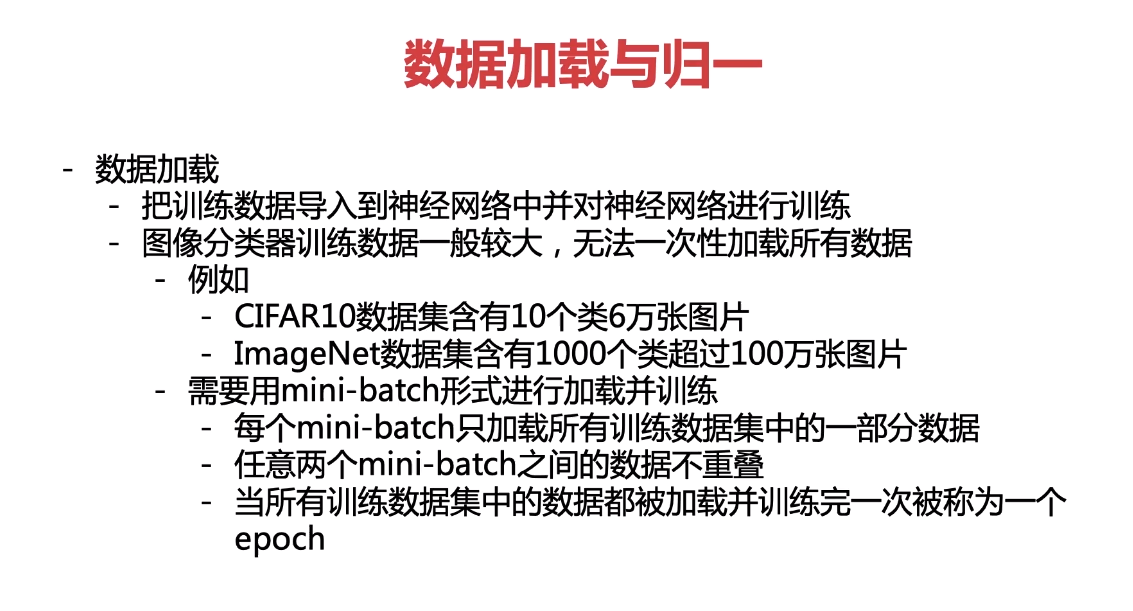

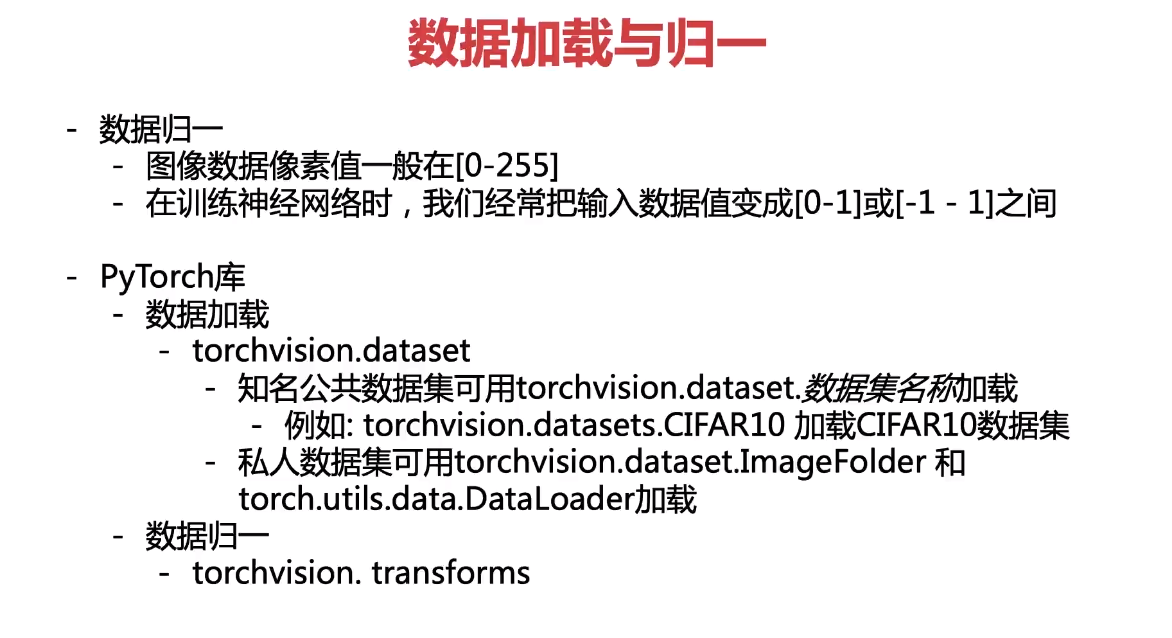

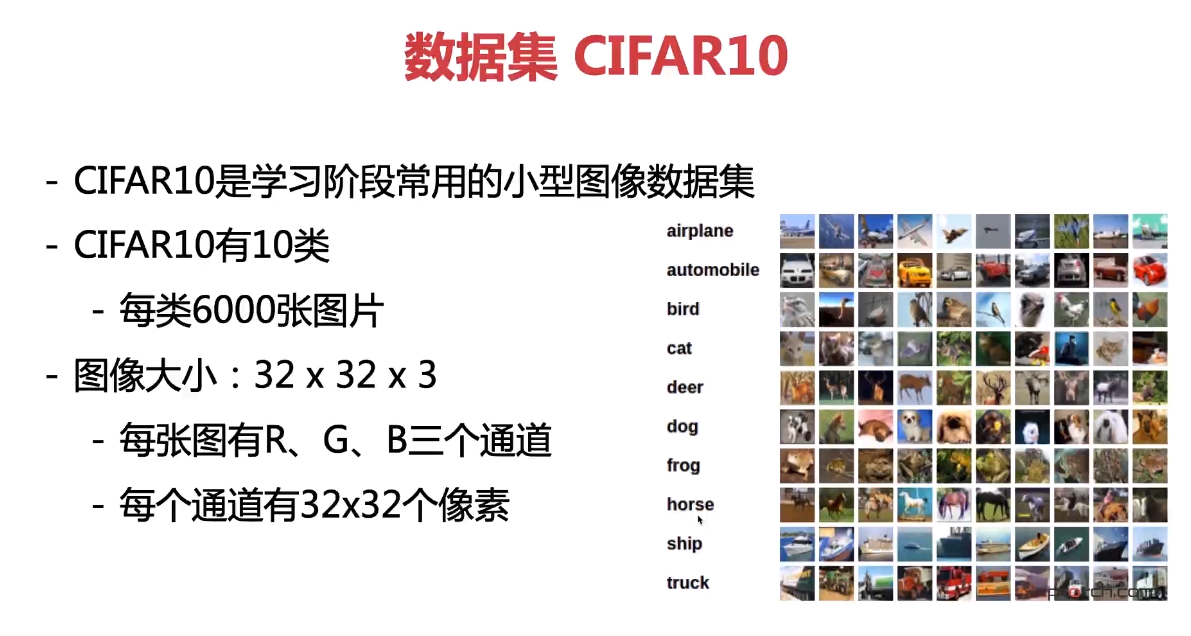

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))   #三个颜色通道的平均值，三个颜色通道的标准差
     #transforms.Flip()  #旋转
    ]
)


#训练集
train = torchvision.datasets.CIFAR10(root='data',train=True,
                                    download=True,transform=transform) #root存储位置
trainloader = torch.utils.data.DataLoader(train, batch_size=4,
                                         shuffle=True,num_workers=2) #batch_size是mini-batch大小 
                                                                     #shuffle打乱顺序，避免输入顺序造成的影响
                                                                     #num_workers是线程数
    
#测试集
test = torchvision.datasets.CIFAR10(root='data',train=False,
                                   download=True,transform=transform)
testloader = torch.utils.data.DataLoader(train, batch_size=4,
                                         shuffle=False,num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


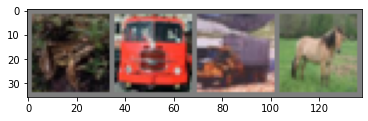

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    # 输入数据:torch.tensor[c,h,w]
    img = img / 2+0.5  #反归一化
    nping = img.numpy()
    nping = np.transpose(nping,(1,2,0)) # [h,w,c]
    plt.imshow(nping)
    
dataiter = iter(trainloader) #随机加载一个mini batch
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

# 若加载私人数据集

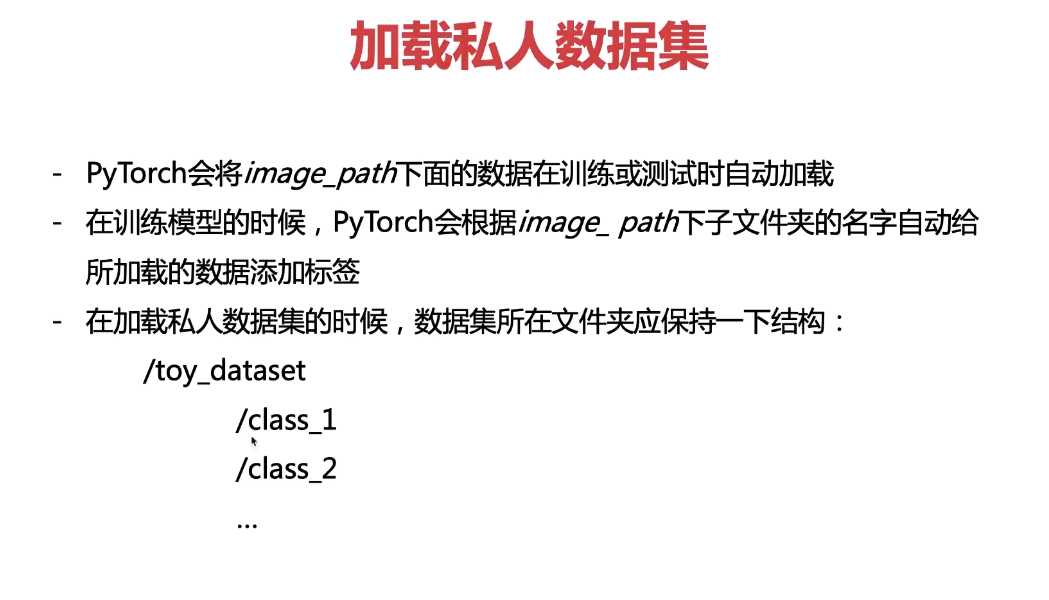

In [4]:
#私人训练集
# privateset = torchvision.datasets.ImageFolder(root=image.path,train=True,
#                                     download=True,transform=transform) #root存储位置
# trainloader = torch.utils.data.DataLoader(train, batch_size=4,
#                                          shuffle=True,num_workers=2) #batch_size是mini-batch大小 
#                                                                      #shuffle打乱顺序，避免输入顺序造成的影响
#                                                                      #num_workers是线程数
    

# 定义神经网络

In [5]:
class Net(nn.Module):
    def __init__(self): #定义神经网络结构, 输入数据 3x32x32
        super(Net, self).__init__()
        # 第一层（卷积层）
        self.conv1 = nn.Conv2d(3,6,3) #输入频道3， 输出频道6， 卷积3x3
        # 第二层（卷积层）
        self.conv2 = nn.Conv2d(6,16,3) #输入频道6， 输出频道16， 卷积3x3
        # 第三层（全连接层）
        self.fc1 = nn.Linear(16*28*28, 512) #输入维度16x28x28=12544，输出维度 512
        # 第四层（全连接层）
        self.fc2 = nn.Linear(512, 64) #输入维度512， 输出维度64
        # 第五层（全连接层）
        self.fc3 = nn.Linear(64, 10) #输入维度64， 输出维度10
    
    def forward(self, x): #定义数据流向
        x = self.conv1(x)
        x = F.relu(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        
        x = x.view(-1, 16*28*28)
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.fc3(x)
        
        return x

In [6]:
net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

# 定义损失函数和网络权值更新规则

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9) #lr学习速率

# 训练

In [25]:
for epoch in range(2):
    for i, data in enumerate(trainloader):    #每次读取一个mini-batch
        images, labels = data
        
        outputs = net(images)
        
        loss = criterion(outputs, labels)     #计算损失
        
        optimizer.zero_grad()   #现有梯度清零
        loss.backward()   #这一次学习的梯度传递回去
        optimizer.step()  #更新权值
        
        if(i%1000 == 0):
            print("Epoch：%d, Step：%d, Loss：%.3f"%(epoch,i,loss.item()))

Epoch：0, Step：0, Loss：2.306
Epoch：0, Step：1000, Loss：1.824
Epoch：0, Step：2000, Loss：1.564
Epoch：0, Step：3000, Loss：2.150
Epoch：0, Step：4000, Loss：1.909
Epoch：0, Step：5000, Loss：1.467
Epoch：0, Step：6000, Loss：1.012
Epoch：0, Step：7000, Loss：0.540
Epoch：0, Step：8000, Loss：1.289
Epoch：0, Step：9000, Loss：2.136
Epoch：0, Step：10000, Loss：0.482
Epoch：0, Step：11000, Loss：1.018
Epoch：0, Step：12000, Loss：2.330
Epoch：1, Step：0, Loss：0.555
Epoch：1, Step：1000, Loss：1.414
Epoch：1, Step：2000, Loss：0.844
Epoch：1, Step：3000, Loss：1.823
Epoch：1, Step：4000, Loss：0.562
Epoch：1, Step：5000, Loss：2.713
Epoch：1, Step：6000, Loss：0.768
Epoch：1, Step：7000, Loss：1.202
Epoch：1, Step：8000, Loss：1.391
Epoch：1, Step：9000, Loss：0.672
Epoch：1, Step：10000, Loss：1.086
Epoch：1, Step：11000, Loss：0.682
Epoch：1, Step：12000, Loss：1.126


In [26]:
# 虽然有波动，但整体呈下降趋势
# batch一般可以取

# 测试模型

In [ ]:
correct = 0.0
total = 0.0

# 测试时不需要计算梯度
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        outputs = net(images)
        
        _,predicted = torch.max(outputs.data, 1)
        
        correct += (predicted==labels).sum()
        total += labels.size(0)
        
print("准确率:",float(correct)/total)

# 保存模型

In [ ]:
# 保存模型
torch.save(net.state_dict(),'./model.pt')

In [ ]:
# 读取模型
net_2 = Net()
net_2.load_state_dict(torch.load('./model.pt'))